### Preliminaries:
import standard libraries

In [2]:
# import standard libraries
import pandas as pd
import numpy as np
import math

**Read in the reviews**

In [3]:
import glob

# read in reviews from the NLTK corpora directory
datadir = '/Users/michaeltang/nltk_data/corpora/movie_reviews'
neg     = datadir + '/neg/'
pos     = datadir + '/pos/'

posarr  = []
negarr  = []

pfiles = [f for f in glob.glob(pos + "*.txt", recursive=False)]
nfiles = [f for f in glob.glob(neg + "*.txt", recursive=False)]
for f in pfiles:
    with open(f) as my_file:
        posarr.append(my_file.read().replace('\n',''))
for f in nfiles:
    with open(f) as my_file:
        negarr.append(my_file.read().replace('\n',''))

### 1. Create a dataframe with labels for positive and negative
* **doc** contains the raw text from teh review
* **label** contains 0 (negative) or 1(positive)

In [4]:
data = {'doc':posarr+negarr, 'label':[1 for i in posarr] + [0 for i in negarr]}
df = pd.DataFrame.from_dict(data)

In [5]:
df.head()

,doc,label
0,assume nothing . the phrase is perhaps one of ...,1
1,plot : derek zoolander is a male model . he is...,1
2,i actually am a fan of the original 1961 or so...,1
3,a movie that's been as highly built up as the ...,1
4,""" good will hunting "" is two movies in one : ...",1


### 2. Split data into training and test sets

In [6]:
from sklearn.model_selection import train_test_split

# split into training and test
training_data, testing_data, y_train, y_test = train_test_split(df[['doc']], df[['label']], train_size = 0.8, random_state = 44)

### 3. Use TfidfVectorizer to tranform into tf-idf features

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# extract features
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(training_data['doc'])
x_test = vectorizer.transform(testing_data['doc'])

In [8]:
print(x_train.shape, x_test.shape)

(1600, 36395) (400, 36395)


### 4. Use `sklearn.linear_model.LogisticRegression` to fit a model to predict probability of positive or negative sentiment.

In [9]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(x_train, y_train['label'])
y_predict = LR_model.predict(x_test)

### 5. Compute **precision score**, **recall score**, **f1 score**, and **average precision score**.


In [10]:
# precision, recall, f1, and average precision below
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
avg_precision = average_precision_score(y_test, LR_model.decision_function(x_test))

print('precision score: {:.2f}'.format(precision))
print('recall score: {:.2f}'.format(recall))
print('f1 score: {:.2f}'.format(f1))
print('average precision score: {:.2f}'.format(avg_precision))

precision score: 0.81
recall score: 0.83
f1 score: 0.82
average precision score: 0.91


### 6. Plot a precision-recall curve, with recall on the x-axis, and precision on the y-axis.


In [11]:
# plot precision-recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
p, r, t = precision_recall_curve(y_test, LR_model.decision_function(x_test))

plt.figure(figsize = (8,8))
plt.plot(r, p)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

<Figure size 800x800 with 1 Axes>

### 7. Plot ROC curve, with false-positive rate on the x-axis, and true-positive rate on the y-axis.

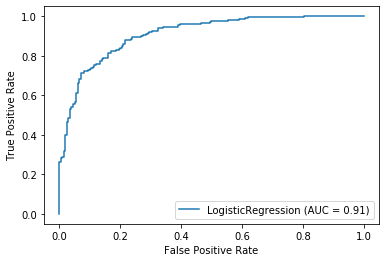

In [19]:
# Plot ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR_model, x_test, y_test)
plt.show()